In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvlib as cv
import warnings
warnings.filterwarnings('ignore')


In [8]:
from cvlib.object_detection import draw_bbox

In [9]:
from numpy.lib.polynomial import poly

In [10]:
image = cv2.imread("image.jpg")

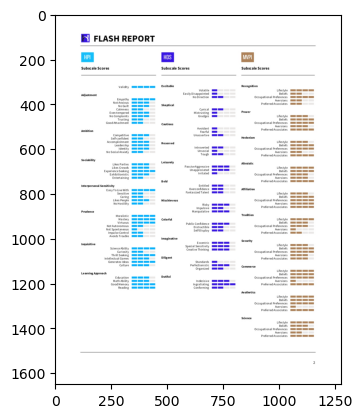

In [11]:
plt.imshow(image)

Number of Red Boxes: 71
Number of Yellow Boxes: 124
Number of Blue Boxes: 168


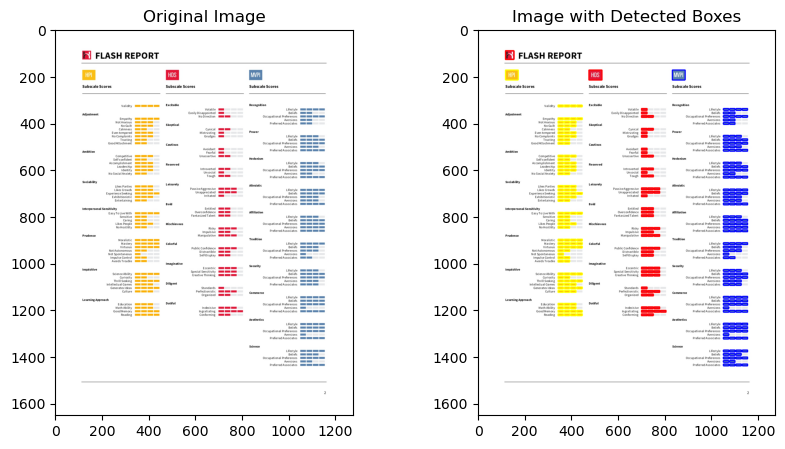

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("image.jpg")

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the HSV range for red, yellow, and blue
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

# Create masks for red, yellow, and blue colors
red_mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
red_mask = red_mask1 + red_mask2

yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
blue_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Find contours for red, yellow, and blue boxes
contours_red, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_yellow, _ = cv2.findContours(yellow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_blue, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Count the number of boxes for each color
red_boxes = len(contours_red)
yellow_boxes = len(contours_yellow)
blue_boxes = len(contours_blue)

# Print the count of each color
print(f"Number of Red Boxes: {red_boxes}")
print(f"Number of Yellow Boxes: {yellow_boxes}")
print(f"Number of Blue Boxes: {blue_boxes}")

# Draw contours around the detected boxes (for visualization)
image_contours = image.copy()
cv2.drawContours(image_contours, contours_red, -1, (0, 0, 255), 3)   # Red contours
cv2.drawContours(image_contours, contours_yellow, -1, (0, 255, 255), 3)  # Yellow contours
cv2.drawContours(image_contours, contours_blue, -1, (255, 0, 0), 3)   # Blue contours

# Display the original image and the image with contours
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
plt.title('Image with Detected Boxes')

plt.show()
